In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)



In [2]:
import pandas as pd

gravity_data = pd.read_csv('gravity_data.csv')
gravity_data.shape

(14, 3)

In [3]:
gravity_data.head()

,altitude (m),time (s),Std. Dev. σ (s)
0,10,1.41,0.02
1,20,2.14,0.12
2,30,2.49,0.02
3,40,2.87,0.01
4,50,3.22,0.03


In [45]:
#trying to fit the prior

# h = 1/2 g t^2
# t = sqrt(2h/g)
# t = sqrt(2h/g) +- std dev

h1 = gravity_data[gravity_data.columns[0]].astype('float')
h1 = np.array(h1)
t1 = gravity_data['time (s)']
t1 = np.array(t1)
s1 = gravity_data[gravity_data.columns[2]]
s1 = np.array(s1)


In [46]:
print(h1)
print(type(h1))

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.]
<class 'numpy.ndarray'>


In [47]:
print(t1)
print(type(t1))

[1.41 2.14 2.49 2.87 3.22 3.49 3.81 4.07 4.32 4.47 4.75 4.99 5.16 5.26]
<class 'numpy.ndarray'>


In [48]:
print(s1)
print(type(s1))

[0.02 0.12 0.02 0.01 0.03 0.01 0.03 0.03 0.03 0.05 0.01 0.04 0.01 0.09]
<class 'numpy.ndarray'>


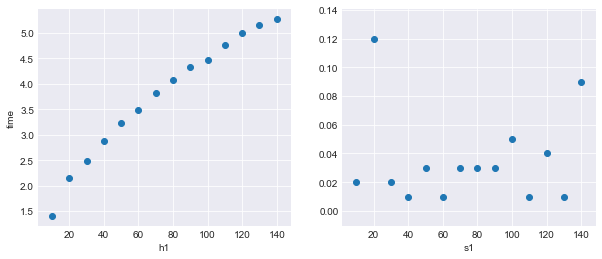

In [51]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(h1, t1)
axes[1].scatter(h1, s1)
axes[0].set_ylabel('time'); axes[0].set_xlabel('h1'); axes[1].set_xlabel('s1');

In [52]:
import pymc3 as pm


Given time and height, calc gravity


In [53]:
gravity_model = pm.Model()

with gravity_model:
    g = pm.Normal('g', mu =0, sigma=2)
    sigma= pm.HalfNormal('sigma', sigma = 1)
    
     
    #expected outcome of variable
    mu = 1/2*g*(t1**2)
    
    #Likelihood (sampling distribution) of observations
    h_obs = pm.Normal('h_obs', mu=mu, sigma=sigma, observed=h1)
    


In [54]:
map_estimate = pm.find_MAP(model=gravity_model)
map_estimate

logp = -42.469, ||grad|| = 3.4653: 100%|█████████████████████████████████████████████| 37/37 [00:00<00:00, 1609.51it/s]


{'g': array(9.79723138),
 'sigma_log__': array(0.44870511),
 'sigma': array(1.5662827)}

In [68]:
import math
gravity_model_2 = pm.Model()

with gravity_model_2:
    g = pm.Normal('g', mu =5, sigma=2) #has to be slightly biased
                                        #because negative values of g will cause destructive interference
    
    sigma= pm.HalfNormal('sigma', sigma=1)
    
    #expected outcome of variable
    mu = (2*h1/g)**0.5
    
    #Likelihood (sampling distribution) of observations
    t_obs = pm.Normal('t_obs', mu=mu, sigma=sigma, observed=t1)
    
    
    

In [69]:
map_estimate = pm.find_MAP(model=gravity_model_2)
map_estimate

C:\Users\Reid\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = 17.304, ||grad|| = 19.851: 100%|██████████████████████████████████████████████| 28/28 [00:00<00:00, 1474.55it/s]


{'g': array(9.762805),
 'sigma_log__': array(-3.0787309),
 'sigma': array(0.04601762)}

In [70]:
#do it again with mcmc

with gravity_model:
    trace = pm.sample(500, chains=2)

print(trace['g'][-5:])



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, g]
Sampling 2 chains: 100%|██████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 1019.52draws/s]
The acceptance probability does not match the target. It is 0.8993095765756007, but should be close to 0.8. Try to increase the number of tuning steps.


[9.77977651 9.86819003 9.86819003 9.76513577 9.74344421]


In [71]:

with gravity_model_2:
    trace = pm.sample(500, chains=2)

print(trace['g'][-5:])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, g]
Sampling 2 chains: 100%|███████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 525.89draws/s]


[9.77680244 9.71820535 9.80093993 9.68188323 9.84593079]
